In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed

Example from https://towardsdatascience.com/k-nearest-neighbors-and-the-curse-of-dimensionality-7d64634015d9

In [10]:
n_samples = 30
k = 3
X = np.random.uniform(0, 1, size=(n_samples,3))
y = np.array(X.sum(axis=1) >= 1.5).astype(int)

x_test = 0.5*np.ones(3)

In [18]:
X

array([[0.91949722, 0.32099013, 0.30032001],
       [0.39571437, 0.39222313, 0.26887466],
       [0.49439415, 0.0123871 , 0.51341827],
       [0.46553942, 0.07029607, 0.00919424],
       [0.47111576, 0.94652772, 0.75900837],
       [0.4057746 , 0.06703693, 0.46288633],
       [0.31748885, 0.88434555, 0.44355549],
       [0.410959  , 0.47464375, 0.54831741],
       [0.84427074, 0.63669899, 0.77587646],
       [0.4387617 , 0.57813114, 0.25440999],
       [0.67598545, 0.32935972, 0.38404912],
       [0.83606647, 0.42437504, 0.64935987],
       [0.97350146, 0.94653919, 0.58729825],
       [0.53650312, 0.08946863, 0.94280298],
       [0.52815065, 0.66778883, 0.55822975],
       [0.98573452, 0.56512943, 0.26767615],
       [0.62860291, 0.4438875 , 0.39375423],
       [0.21078219, 0.6017984 , 0.69680647],
       [0.81180664, 0.95891131, 0.36734981],
       [0.27993926, 0.47675991, 0.27111782],
       [0.68413658, 0.35833629, 0.61037617],
       [0.3065645 , 0.85436341, 0.79892765],
       [0.

In [19]:
# Get nearest neighbors
distances = np.array([np.linalg.norm([x_test[0]] - x_train, ord=2) for x_train in X[:, 0]])
nn = np.argsort(distances)[:k]
mdist = np.max(distances[nn])

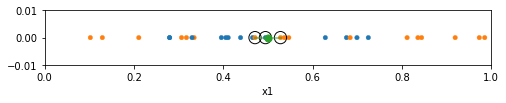

In [15]:
# Figure formatting stuff
plt.figure(figsize=(8,1))
plt.xlim(0,1);
plt.ylim(-0.01, 0.01);
plt.xlabel("x1")
# Plot training data
sns.scatterplot(x=X[:,0], y=0, hue=y, s=20, edgecolor=None, legend=False);
# Plot region that encloses nearest neighbors
plot_colors = np.array(sns.color_palette().as_hex())
plt.plot([x_test-mdist, x_test+mdist], [0,0], color=plot_colors[2], lw=2, alpha=0.2);
# Plot nearest neighbors
sns.scatterplot(x=X[nn,0], y=0, facecolors='none', edgecolor='black', s=150);
# Plot test point
plt.scatter(x=x_test[0], y=0, facecolor=plot_colors[2], s=50);

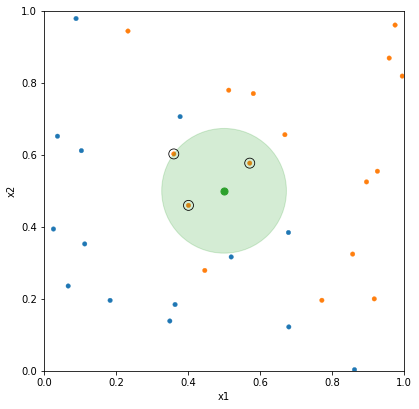

In [7]:
# Get nearest neighbors
distances = np.array([np.linalg.norm(x_test[0:2] - x_train, ord=2) for x_train in X[:, 0:2]])
nn = np.argsort(distances)[:k]
mdist = np.max(distances[nn])

# Figure formatting stuff
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
plt.xlim(0,1);
plt.ylim(0,1);
plt.xlabel("x1")
plt.ylabel("x2")

# Plot training data
sns.scatterplot(x=X[:,0], y=X[:,1], hue=plot_colors[y], s=20, edgecolor=None, legend=False, ax=ax);
# Plot region that encloses nearest neighbors
circle = plt.Circle(x_test,mdist,
                          fill=True, color=plot_colors[2], alpha=0.2, zorder=1)
ax.add_patch(circle)
# Plot nearest neighbors
sns.scatterplot(x=X[nn,0], y=X[nn,1], facecolors='none', s=100, edgecolor='black', legend=False, ax=ax);
# Plot test point
plt.scatter(x=x_test[0], y=x_test[1], facecolor=plot_colors[2], s=50);

In [9]:
def plot_3D(elev=20, azim=-20, X=X, y=y, x_test=x_test):
    # Figure formatting stuff
    plt.figure(figsize=(10,10))
    ax = plt.subplot(projection='3d')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_zlim(0, 1)

    # Get nearest neighbors
    distances = np.array([np.linalg.norm(x_test - x_train, ord=2) for x_train in X])
    nn = np.argsort(distances)[:k]
    mdist = np.max(distances[nn])

    # Plot training data
    ax.scatter3D(X[:,0], X[:,1], X[:,2], s=50, c=plot_colors[y])

    # Plot region that encloses nearest neighbors
    u, v = np.mgrid[0:2*np.pi:16*1j, 0:np.pi:8*1j]
    sphere_x = x_test[0] + mdist * np.cos(u) * np.sin(v)
    sphere_y = x_test[1] + mdist * np.sin(u) * np.sin(v)
    sphere_z = x_test[2] + mdist * np.cos(v)
    ax.plot_wireframe(sphere_x, sphere_y, sphere_z, alpha=0.2, color=plot_colors[2])

    # Plot nearest neighbors
    ax.scatter3D(X[nn,0], X[nn,1], X[nn,2], s=150, c=plot_colors[y[nn]], edgecolor='black')

    # Plot test point
    ax.scatter3D(x_test[0], x_test[1], x_test[2], s=200, color=plot_colors[2])

interact(plot_3D, elev=np.arange(-90,90,10), azim=np.arange(-90,90,10),
         X=fixed(X), y=fixed(y), x_test=fixed(x_test));

interactive(children=(Dropdown(description='elev', index=11, options=(-90, -80, -70, -60, -50, -40, -30, -20, …


 - Avstånd från [0,0,0..0] till [1,1,1,..1] = sqrt(1+1+1...+1) -> 
 - Tillväxthastighet svarar mot roten ur summan
 - Så flera diensioner ger inte mer information
 - Så även om vi har mer information i classifiers som använder distansmått (t.ex. kNN) 
inte nödvändigtvis gynnas av att inkludera all information!


In [20]:
dim = 10000
nr_of_dimensions = np.arange(dim) # lista med värden 0 till dim-1

#Gör en lista med värden där varje värde är avståndet till nollpunkten för [1, 1, 1.. 1]-vektorer
norm_list = [np.linalg.norm(np.ones(vector)) for vector in range(dim)]
print(norm_list[:10])

[0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.8284271247461903, 3.0]


Text(0.5, 1.0, 'Distance to origin for n-dimensional [1,1,..1] vectors')

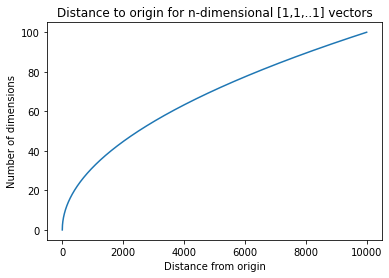

In [3]:
plt.plot(nr_of_dimensions, norm_list)
plt.ylabel("Number of dimensions")
plt.xlabel("Distance from origin")
plt.title("Distance to origin for n-dimensional [1,1,..1] vectors")